# HOMEWORK 6 Assignment 4

### Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn (extra credit)
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [1]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np


%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json


Populating the interactive namespace from numpy and matplotlib


In [2]:
# ove the downloaded data to PUI data
import os
print("PUIdata", os.getenv("PUIDATA"))
#this works in the command line, but is not working in the jupyter notebook when putting data in place

#create the env variable if missing-- needed to create
#added PUI2018 to path 
os.environ["PUIDATA"] = "%s/PUI2018/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))


# # move the data
# !mv bustimes.txt $PUIDATA

PUIdata /nfshome/sjf374/PUIdata
PUIdata /nfshome/sjf374/PUI2018/PUIdata


In [3]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will check that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [4]:
datestring = '201501'
getCitiBikeCSV(datestring)

file in place, you can continue


In [5]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [6]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [7]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

# SPLIT BY CATEGORY

**H0: there is no statistical difference in the duration of bike ride distribution for day and night time rides - specifically looking at the start time of a ride**
$$ \alpha = 0.05 $$



In [8]:
df['usertype'].unique()
#why only subscriber?

array(['Subscriber', 'Customer'], dtype=object)

In [9]:
#df is the dataframe where the content of the csv file is stored
df['dur_day'] = df['tripduration'][(df['usertype'] == 'Subscriber') & (df['date'].dt.hour >= 6) & (df['date'].dt.hour < 18)]
df['dur_night'] = df['tripduration'][(df['usertype'] == 'Subscriber') & ((df['date'].dt.hour >= 18) |  (df['date'].dt.hour <6))]

In [10]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,dur_day,dur_night
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00,NaN,1346.0
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00,NaN,363.0
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00,NaN,346.0
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00,NaN,182.0
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00,NaN,969.0


In [11]:
df.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,dur_day,dur_night
285547,169,1/31/2015 23:57,2/1/2015 0:00,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,368,Carmine St & 6 Ave,40.730386,-74.002150,17456,Subscriber,1956.0,1,2015-01-31 23:57:00,NaN,169.0
285548,827,1/31/2015 23:58,2/1/2015 0:12,252,MacDougal St & Washington Sq,40.732264,-73.998522,440,E 45 St & 3 Ave,40.752554,-73.972826,17669,Subscriber,1976.0,1,2015-01-31 23:58:00,NaN,827.0
285549,798,1/31/2015 23:58,2/1/2015 0:11,127,Barrow St & Hudson St,40.731724,-74.006744,433,E 13 St & Avenue A,40.729554,-73.980572,20237,Subscriber,1994.0,1,2015-01-31 23:58:00,NaN,798.0
285550,725,1/31/2015 23:58,2/1/2015 0:10,435,W 21 St & 6 Ave,40.741740,-73.994156,368,Carmine St & 6 Ave,40.730386,-74.002150,21029,Subscriber,1957.0,1,2015-01-31 23:58:00,NaN,725.0
285551,892,1/31/2015 23:59,2/1/2015 0:14,504,1 Ave & E 15 St,40.732219,-73.981656,295,Pike St & E Broadway,40.714067,-73.992939,18342,Subscriber,1974.0,1,2015-01-31 23:59:00,NaN,892.0


In [12]:
#dropping some data I no longer need
wdf = df[['dur_day', 'dur_night']]
wdf.head()

,dur_day,dur_night
0,NaN,1346.0
1,NaN,363.0
2,NaN,346.0
3,NaN,182.0
4,NaN,969.0


In [13]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
wdf.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,dur_day,dur_night
count,199657.000000,80267.000000
mean,643.024878,616.883875
std,816.480097,923.033237
min,60.000000,60.000000
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,43023.000000,42896.000000


### Of interest: 
    there are more day trips than night trips
    the mean is larger for day trips
    the standard deviation is larger for night trips
    1 minute is always the minimum amount for a trip
    (717 vs. 715 min) The max time a bike ride lasts for is about 12 hours for both day and night. 


In [14]:
wdf.head()

,dur_day,dur_night
0,NaN,1346.0
1,NaN,363.0
2,NaN,346.0
3,NaN,182.0
4,NaN,969.0


In [15]:
# dropping NaN values
dayseries = wdf['dur_day'].dropna()
nightseries = wdf['dur_night'].dropna()

lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

In [19]:
dayseries.describe()

count    199657.000000
mean        643.024878
std         816.480097
min          60.000000
25%         335.000000
50%         503.000000
75%         765.000000
max       43023.000000
Name: dur_day, dtype: float64

In [37]:
dayseries.quantile([.25, .5, .997])

0.250     335.000
0.500     503.000
0.997    3588.352
Name: dur_day, dtype: float64

In [23]:
nightseries.describe()

count    80267.000000
mean       616.883875
std        923.033237
min         60.000000
25%        323.000000
50%        486.000000
75%        737.000000
max      42896.000000
Name: dur_night, dtype: float64

In [42]:
nightseries.quantile([.25, .5, .997])

0.250     323.000
0.500     486.000
0.997    2987.202
Name: dur_night, dtype: float64

In [43]:
#setting upper limit to 3600 caprtures 99.7% of the data for both day and night

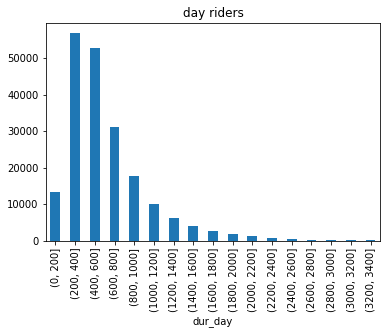

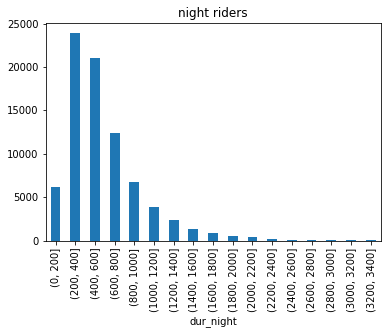

In [40]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(0,3600, 200)
axD = dayseries.groupby(pd.cut(dayseries, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axD.set_title("day riders")
axN = nightseries.groupby(pd.cut(nightseries, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axN.set_title("night riders");


**Figure 1: histogrammed distribution of ride duration by Day or Night **
The distribution of ride duration seems very similar when binned. visually the major difference is the overall counts.

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

              count_nonzero
dur_day                    
(0, 200]           0.009378
(200, 400]         0.022260
(400, 600]         0.020211
(600, 800]         0.018394
(800, 1000]        0.014875
(1000, 1200]       0.014061
(1200, 1400]       0.012396
(1400, 1600]       0.008342
(1600, 1800]       0.006068
(1800, 2000]       0.003940
(2000, 2200]       0.003093
(2200, 2400]       0.002143
(2400, 2600]       0.001203
(2600, 2800]       0.000657
(2800, 3000]       0.000445
(3000, 3200]       0.000215
(3200, 3400]       0.000000


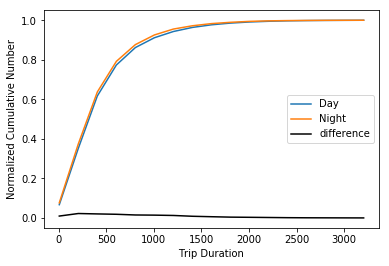

In [45]:
#print df.ageS, df.ageS.cumsum()

csD=dayseries.groupby(pd.cut(dayseries, bins)).agg([count_nonzero]).cumsum()

csN=nightseries.groupby(pd.cut(nightseries, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csD / csD.max()-csN / csN.max()))

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "Day")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "Night")
pl.plot(bins[:-1] + 5, np.sqrt(csN / csN.max() - csD / csD.max())**2, 'k-',
        label = "difference")
pl.xlabel("Trip Duration")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2: the cumulative distribution of CitiBike ride durations by time of day**
This graph further solidifies the lack of difference between Day and Night distribution

They look similar! The difference doesn't even make it to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [60]:
import scipy.stats as stats
#will leave it here to keep it consistent
#remember that your imports should all be at the top. I leave it here to hightlight that this package is needed at this point of the workflow

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [47]:
ks = scipy.stats.ks_2samp(dayseries, nightseries)
print (ks)

Ks_2sampResult(statistic=0.025302258036716263, pvalue=2.7119031118083195e-32)


**  FILL IN THE CELL BELOW!**

We are unable to reject the null hypothesis since the p value (2.71) is much greater than .05 and the statistic value is small. 

The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

In [17]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS
# NOT REQUIRED?

# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [51]:
dayseries.size

199657

In [52]:
nightseries.size

80267

In [55]:
#reducted day series

In [56]:
Rdayseries = dayseries.sample(n=80267, random_state=666)

In [57]:
Rdayseries.size

80267

In [61]:
stats.pearsonr(Rdayseries, nightseries)

(-0.0017874748723761343, 0.6125690428784436)

"The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so." - lukily these datasets do comply

From a linear correlation standpoint these datasets do not have much correlation as the correlation coefficient is so close to 0. Of course this is assuming a lot: that the correlation would be linear and that the two datasets have a normal distribution. 

We are unable to reject the null with such a high p value (.612)


# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [63]:
stats.spearmanr(Rdayseries, nightseries)

SpearmanrResult(correlation=-0.0048683462436920604, pvalue=0.16781495454526407)

Though not as large as the output of the KS inital test, the p value is still too large to reject the null. It is interesting that the correlation is close to 0 considering how similar the datasets are and the previous test outcomes. 

In this test, it is not assumed that the distribution is normal.


** please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??**